### Repeated-measures ANOVA example with 3 conditions (auditory, visual, and audiovisual)

Based on [Crosse et al (2015)](https://www.jneurosci.org/content/35/42/14195.full)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import f

# Set styles for plotting
sns.set_style('whitegrid')
sns.set_context('talk')

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of subjects and levels
n_subjects = 20
levels = ['AV','A','V']
n_levels = len(levels)

# Mean values and standard deviation for each level
means = [600, 650, 800]
std_dev_sbj = 100 # this is the st. dev. across participants
std_dev_wthn = 30 # this is the st. dev. within participants

# Simulate data ensuring values are between 0 and 100
data = []
for subject in range(1, n_subjects + 1):
    sbj_avg = np.random.normal(0, std_dev_sbj)
    for level in range(1, n_levels + 1):
        value = np.random.normal(means[level - 1], std_dev_wthn)
        value = value+sbj_avg  # Ensure value is between 0 and 100
        data.append([subject, levels[level-1], value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Subject', 'Condition', 'Response time'])

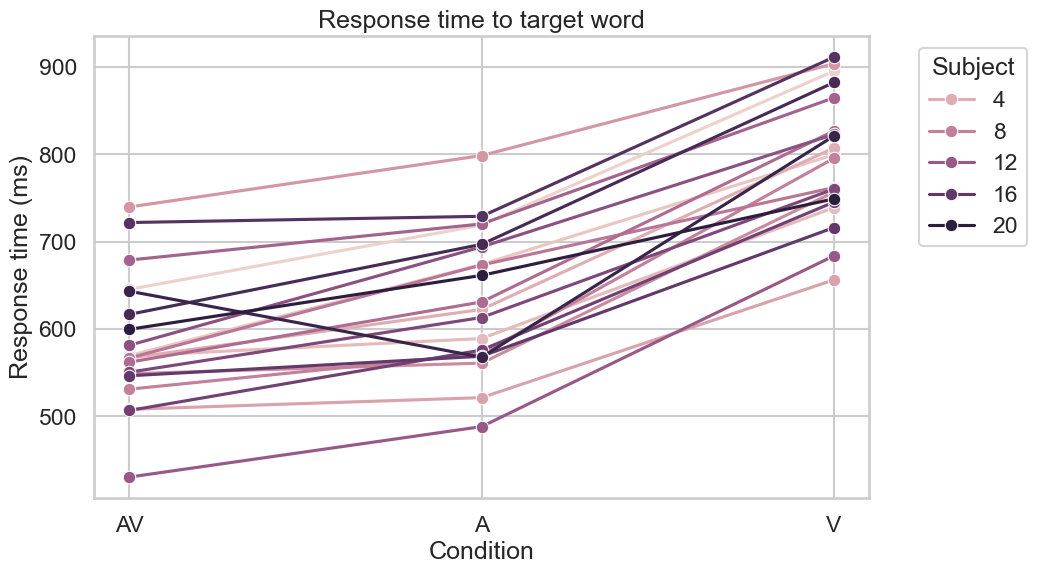

In [36]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Condition', y='Response time', hue='Subject', marker='o')
plt.title('Response time to target word')
plt.xlabel('Condition')
plt.ylabel('Response time (ms)')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
# Run the repeated-measures ANOVA
aov = pg.rm_anova(dv='Response time', within='Condition', subject='Subject', data=df, detailed=True, effsize="np2")
# Display the overall results
print(aov)

      Source             SS  DF             MS           F         p-unc  \
0  Condition  485471.971850   2  242735.985925  273.711939  2.716127e-23   
1      Error   33699.543699  38     886.830097         NaN           NaN   

       np2       eps  
0  0.93509  0.992259  
1      NaN       NaN  


In [27]:
# Display individual important items
# - Degrees of freedom
dof1 = aov['DF'][0]
dof2 = aov['DF'][1]
print(f'Degrees of freedom: ({dof1},{dof2})')

# - F-statistic
Fstat = aov['F'][0]
print(f"F-statistic = {Fstat}")

# - p-value
print(f"p = {aov['p-unc'][0]}")

# - partial eta-squared
print(f"partial eta-squared = {aov['np2'][0]}")

Degrees of freedom: (2,38)
F-statistic = 273.7119394724571
p = 2.7161272294714877e-23
partial eta-squared = 0.9350897676594848


In [25]:
# rm_anova does not display the between subjects sum-of-squares. Calculate this effect manually
SS_total = sum(np.power(df['Response time'] - df['Response time'].mean(),2))
print(f'Total SS = {SS_total}')
sbj_mean = df[['Subject','Response time']].groupby('Subject').mean()
SS_sbj = sum(np.power(sbj_mean['Response time'] - df['Response time'].mean(),2)) * n_levels
print(f'Subject SS = {SS_sbj}')

# Does SS_sbj + SS_condition + SS_error = SS_total?
print(f"SS_sbj + SS_cond + SS_error = {SS_sbj + aov['SS'][0] + aov['SS'][1]}")

Total SS = 809490.4980368398
Subject SS = 290318.98248797236
SS_sbj + SS_cond + SS_error = 809490.4980368395


### Show the F-statistic and p-value calculation

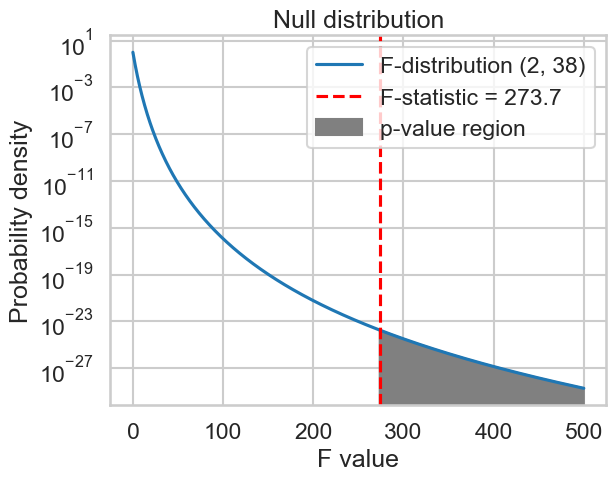

In [39]:
# Define the range of x values
x = np.linspace(0, 500, 1000)

# Calculate the F-distribution values
y = f.pdf(x, dof1, dof2)

# Plot the F-distribution
plt.plot(x, y, label=f'F-distribution ({dof1}, {dof2})')

# Define the F-statistic value
f_stat = Fstat

# Label the F-statistic value on the plot
plt.axvline(f_stat, color='r', linestyle='--', label=f'F-statistic = {f_stat:.1f}')

# Shade the region for p-value calculation
x_fill = np.linspace(f_stat, 500, 1000)
y_fill = f.pdf(x_fill, dof1, dof2)
plt.fill_between(x_fill, y_fill, alpha=1, color='gray', label='p-value region')

# Add labels and title
plt.yscale('log')
plt.xlabel('F value')
plt.ylabel('Probability density')
plt.legend()

# Show the plot
plt.show()

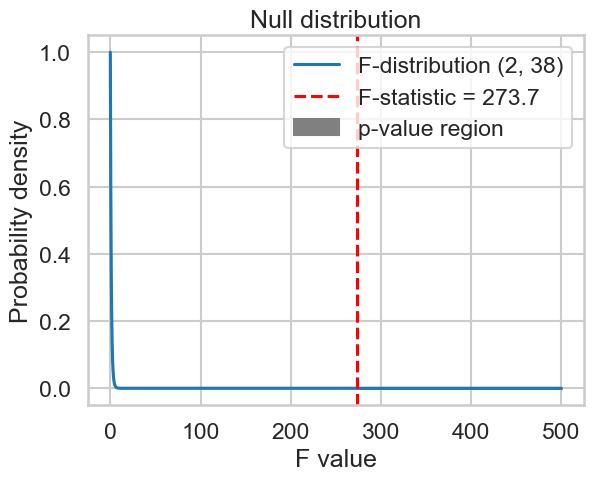

In [41]:
# Create the same plot, using the linear y axis
plt.plot(x, y, label=f'F-distribution ({dof1}, {dof2})') # Null distribution
plt.axvline(f_stat, color='r', linestyle='--', label=f'F-statistic = {f_stat:.1f}')
plt.fill_between(x_fill, y_fill, alpha=1, color='gray', label='p-value region')
plt.yscale('linear')
plt.xlabel('F value')
plt.ylabel('Probability density')
plt.legend()

# Show the plot
plt.show()

### Demonstration of sphericity
Plot the relationship between pairs of conditions, as well as the variability across subjects in the difference between conditions.